In [1]:
import os
import configparser
from datetime import date
import pandas as pd
import re
import graphviz
import math
import seaborn as sns

import collections
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.pyplot import figure
mpl.rcParams['figure.dpi'] = 100
sns.set(style="whitegrid")

from tqdm import tqdm
from tqdm import trange

#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

c:\Users\ashis\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\ashis\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
PATH = os.getcwd()[:os.getcwd().rfind('\\')] # path to ProFIT directory
config = configparser.ConfigParser()
config.add_section("packageLocation")
config.set("packageLocation", "workingDir", PATH)
config.set("packageLocation", "packageDir", PATH+'\\profit')


import sys
sys.path.append(config["packageLocation"]["workingDir"])
sys.path.append(config["packageLocation"]["packageDir"])


from profit import ProcessMap
pm = ProcessMap()


In [3]:
def Filter(net):
        temp = str(net)
        temp = temp.lower()
        temp = re.sub("\d",'', temp)
        temp = re.sub('node',' ', temp)
        temp = re.sub('\(', "", temp)
        temp = re.sub('\)', "", temp)
        temp = re.sub('\[', "", temp)
        temp = re.sub('\]', "", temp)
        temp = re.sub('\{', "", temp)
        temp = re.sub('\}', "", temp)
        temp = re.sub('connections',' ', temp)
        temp = re.sub('-', '', temp)
        temp = re.sub(' ','', temp)
        
        temp = re.sub('\:','', temp)
        temp = re.sub('\,',' ', temp)
        temp = re.sub('\'','', temp)
        temp = re.sub('\.','', temp)
        temp = re.sub(' +', '', temp)
        temp = re.sub('"', '', temp)
        return temp
    
def Final(net):
        temp = str(net)
        temp = temp.lower()
        temp = re.sub("\d",'', temp)
        temp = re.sub('node',' ', temp)
        temp = re.sub('\(', "", temp)
        temp = re.sub('\)', "", temp)
        temp = re.sub('\[', "", temp)
        temp = re.sub('\]', "", temp)
        temp = re.sub('\{', "", temp)
        temp = re.sub('\}', "", temp)
        temp = re.sub('connections',' ', temp)
        temp = re.sub(' ','', temp)
        
        temp = re.sub('\:',' ', temp)
        temp = re.sub('\,',' ', temp)
        temp = re.sub('\'',' ', temp)
        temp = re.sub('\.',' ', temp)
        temp = re.sub(' +', ' ', temp)
        temp = re.sub('"', ' ', temp)
        HT = pd.DataFrame([x.split(' ') for x in temp.split('\n')])
        HT = HT.transpose()
        HT = HT.drop([0]).reset_index(drop = True)
        HT.columns = ['Task']
        HT= HT.drop(index=HT.index[-1])
        HT = HT.drop_duplicates(ignore_index=True)
        HT = HT.sort_values("Task").reset_index(drop = True)
        #print(HT)
    
        return HT 

In [4]:
def MINER(in_data, act, path):

    pm.set_log(data = in_data)
          
    # Have to change "Optimize" State when using Manual Path & Activity Rates
    pm.set_params(optimize = False, aggregate = False) # Optimize = TRUE/FALSE # Agg_type = inner/outer
        
        
    # Will be activated only when "OPTIMIZE" from above is changed to "False"
    pm.set_rates(activity_rate = act, path_rate = path ) # Rates = Activity & Path rate only 
       
    # Logic on this (or in % , where 100% means complete utilization & 0% Vice Versa) 
    # Activity Rate = The precision/clarity of the model/graph being produced (i.e. when at 100 = all events are displayed, when at 5-10 low number of events with the most highest weightage are displayed)
    # Path rate = the regulation of paths (i.e. aggregation of path in %)0 = high aggregation of path, 100 % super detailed paths to every case/task
        
    pm.update() # Updates settings
        
    # pm.render() # Renders the Final Process Model
        
    print(pm.get_rates())
        
    net = pm.get_graph()
   
    return net### Net Graph GENERATOR 

# Dataset 1

In [7]:
df = pd.read_csv("Dataset_1.csv")
df1 = df[df['task'] != 'New med program operator']
df = df1.reset_index(drop = True)
df

,case_id,task,timestamp
0,4082,Red zone operator,2018-01-10 22:09:21
1,4082,Red zone doctor FD,2018-01-12 02:44:28
2,4173,Red zone operator,2018-01-12 11:16:53
3,4176,Red zone operator,2018-01-12 11:49:30
4,4176,Red zone doctor FD,2018-01-12 11:49:50
...,...,...,...
35353,9155,Notification operator,2018-12-31 09:03:14
35354,9362,Notification operator,2018-12-31 09:03:16
35355,9758,Notification operator,2018-12-31 09:03:23
35356,9938,Notification operator,2018-12-31 09:03:26


{'activities': 100, 'paths': 30}


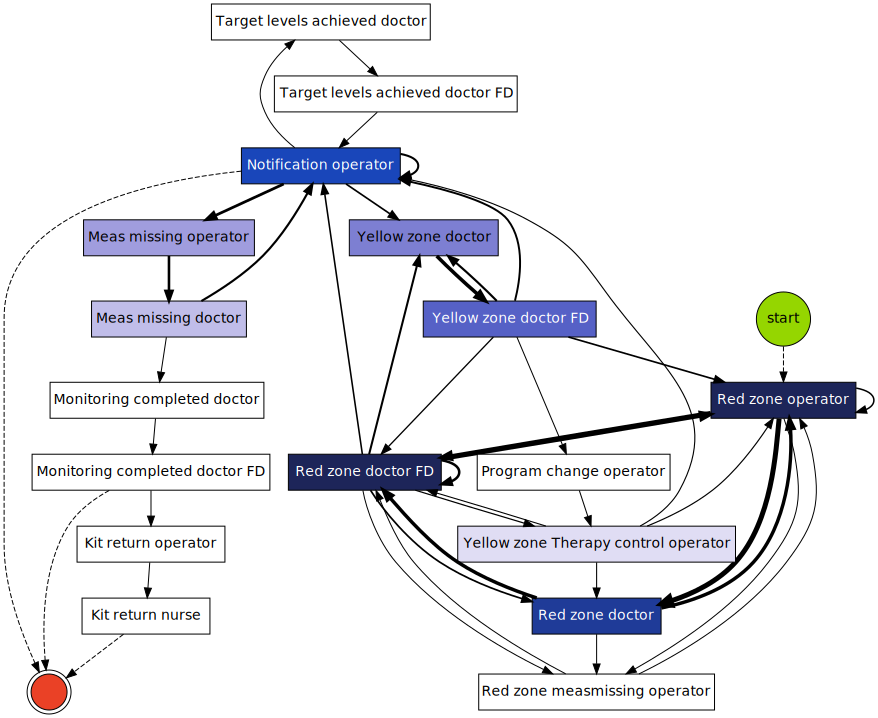

In [11]:
MINER(df,100,30)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\NN_D1_OPT")

# Dataset 3

In [5]:
df3 = pd.read_csv("Dataset_4_Part_1.csv")
df3 = df3[df3['task'] != 'New med program operator']
df3 = df3.reset_index(drop = True)
df3

,case_id,task,timestamp
0,A,NEW,2012-12-16 19:33:10+01:00
1,A,FIN,2013-12-15 19:00:37+01:00
2,A,RELEASE,2013-12-16 03:53:38+01:00
3,A,CODE OK,2013-12-17 12:56:29+01:00
4,A,BILLED,2013-12-19 03:44:31+01:00
...,...,...,...
89083,ZZZ,CHANGE DIAGN,2013-06-15 00:07:16+02:00
89084,ZZZ,FIN,2013-09-11 00:16:11+02:00
89085,ZZZ,RELEASE,2013-09-11 01:43:21+02:00
89086,ZZZ,CODE OK,2013-09-18 07:49:20+02:00


{'activities': 1, 'paths': 1}


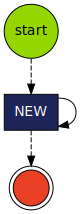

In [6]:
MINER(df3,1,1)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\NN_D3_OPT")

# Dataset 5

In [25]:
df5 = pd.read_csv("Dataset_6_Part_1.csv")
df5 = df5[df5['task'] != 'New med program operator']
df5 = df5.reset_index(drop = True)
df5

,case_id,task,timestamp
0,1,Triage,1970-01-01 01:00:00+01:00
1,1,Register,1970-01-01 01:17:00+01:00
2,1,Check,1970-01-01 01:40:00+01:00
3,1,X-Ray,1970-01-01 01:40:00+01:00
4,1,Visit,1970-01-01 01:44:00+01:00
...,...,...,...
99584,19999,Visit,1973-06-05 15:29:00+01:00
99585,19999,Check,1973-06-05 15:42:00+01:00
99586,19999,Final Visit,1973-06-05 15:53:00+01:00
99587,19999,Prepare,1973-06-05 16:16:00+01:00


{'activities': 10, 'paths': 10}


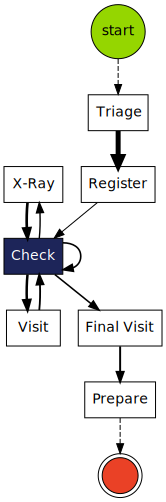

In [29]:
MINER(df5,10,10)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\NN_D5_OPT")

# Dataset 7

In [30]:
df8 = pd.read_csv("Dataset_8.csv")
df8 = df8[df8['task'] != 'New med program operator']
df8 = df8.reset_index(drop = True)
df8

,case_id,task,timestamp
0,A,ER Registration,2014-10-22 11:15:41+02:00
1,B,Leucocytes,2014-10-22 11:27:00+02:00
2,B,CRP,2014-10-22 11:27:00+02:00
3,B,LacticAcid,2014-10-22 11:27:00+02:00
4,C,ER Triage,2014-10-22 11:33:37+02:00
...,...,...,...
15209,B,CRP,2014-12-16 07:00:00+01:00
15210,E,Release A,2014-12-16 17:00:00+01:00
15211,L,ER Registration,2014-12-03 10:50:28+01:00
15212,C,ER Triage,2014-12-03 10:54:19+01:00


{'activities': 100, 'paths': 10}


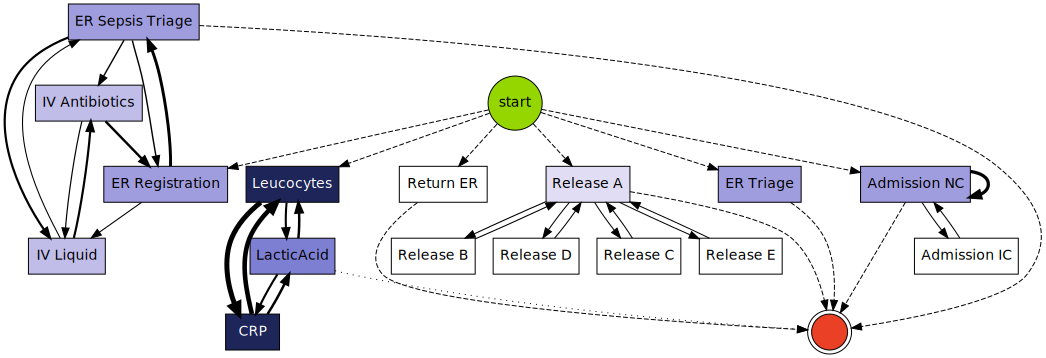

In [34]:
MINER(df8,100,10)
pm.render(show_only=False, save_path = "C:\\Users\\ashis\\Desktop\\NN_D7_OPT")